# **Heart Disease prediction using Machine Learning**

We're going to use various python based ML & Data Science libraries in order to build a Machine learning Model capable of predicting whether a patient has heart disease, based on the medical data of the patient.

We'll use **Supervised machine learning** as the data we've is labelled.

We'll use the following steps to define our workflow:

1. **Problem definition :** What's the problem, it's type in ML & what we have to get as output.
2. **Data :** Look into the data we've, it's source, properties etc.
3. **Target (Success) :** What is success for us, what level of results we wanted from our model.
4. **Features :** Look into the Features **(predicting variables)**, what's necessary etc.
5. **Modelling :** It includes a number of things.
    * Get the data ready for the model, Explore and preprocess it.
    * Get the best base model for our data & problem, it is generally recursive approach.
    * Evaluate our model on various metrics & with different techniques.
    * Quantify the model's performance, as results.
6. **Experimentation :** The overall Process is very experimental, we've to try different things & determine the best output for us.

At the end **ML is all about Experimentation.**

<img src="./Images/Steps.png" width=1000>

## **Let's tackle the steps:**


### **1. Problem :**

In a statement,
> Given clinical attributes of a patient, can we predict whether the patient has any heart disease or not?

The problem is a **ML Binary Classification** problem i.e. we've to determine whether a patient belongs to diseased group or not!

### **2. Data :**

> The original data comes from UCI Machine Learning Repo, Cleveland data [repository](https://archive.ics.uci.edu/dataset/45/heart+disease).

There is also a Kaggle Notebook of the dataset for more details [here](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data).

### **3. Target | Success**

We're building a model to predict whether a patient has heart disease or not!.

**medical** predictions are really **crucial**, We will target a **95% or over** prediction accuracy for our model to be used in Production.

### **4. Features Understanding**

Here, the dataset is **already curated** & have all **14 important features** present.

**The Data Dictionary**, what the columns mean!


A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).


1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


---
### **5. modelling**
## **Now, more specifically, we'll look at the following topics.**

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?


| <img src="./images/supervised-projects-6-step-ml-framework-tools-highlight.png" width=500/> | 
|:--:| 
| Tools which can be used for each step of the machine learning modelling process. |


## **Preparing the tools | Import statements**

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

Some of the imports are general in Classification Projects.

And the Models/Estimators we're importing are just for start, we can import what we needed later on.

In [1]:
# Importing expected tools we need.

# Regular EDA, data preprocessing and plotting libraries
import numpy as np # Numerical methods
import pandas as pd # Data manipulation & preprocessing
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # For other plotting.

# Expected useful Estimators/models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation metrics and techniques.
from sklearn.metrics import accuracy_score, classification_report # Classification model evaluators
from sklearn.metrics import f1_score, precision_score, recall_score 
from sklearn.model_selection import train_test_split, cross_val_score # Splitting & cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay # Displaying metric results

# Plotting graphs inside the Notebook
%matplotlib inline

## **Import or Load the Data:**

In [2]:
# Importing the data into a Pandas DataFrame object.

heart_disease_df = pd.read_csv("./dataCSV/heart-disease.csv")

# Imported successfully!
heart_disease_df # 303 rows & 14 columns.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## **Exploratory Data Analysis (EDA)**

To do anything next, we have to know our data well, here **EDA** comes handy, Data Exploration means exploring the data we have in a way
we can get better understanding of our data and it's structure.

Just refer back to the **data dictionary**, compare different columns with each other, with target to know there similarities, distinction & relation
more robustly.

Understand the Distribution of the Data Features, Outliers that may affect the predictions, also know what part of the data is missing from our data.
Which features are important, which can be removed, modified, or added to make our data more complete for the prediction.


**Since EDA has no set Methodology, we'll follow our own steps below :**

1. What questions we're answering, or trying the solve (or proof wrong)?
2. What kind of data we have, column data types, how we treat different data types?
3. what is missing from our data, how we'll tackle the missing data?
4. What is the shape of data, what are the columns, what they really mean?
5. Which columns contains outliers, they affect us? how to handle them?
6. Handle multiple features. Add, remove or change Features in our data.

**Let's begin the Exploration :**

In [3]:
# See the head of the data | First 5 rows.
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Shape of the data
heart_disease_df.shape
# We have 303 rows and 14 columns.

(303, 14)

In [5]:
# Types of data in each column, do they contain missing values?
heart_disease_df.info()

# As we can see, there's no missing value in any column.
# And all the columns are already in Numerical format (required)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Let's find out how many records belong to **Patients with heart disease** & how many to **without heart disease**.

We can have number of instances from each category in a categorical column.

In [6]:
# Let's find out how many records have Heart disease and how many not!!
heart_disease_df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

They are almost close, in this case our data is **Balanced** across classes. This is **idle situation for 
classification datasets**.

> In case of **Imbalanced data** i.e. data having more samples of a single category/class than another,
> our output can be affected, and **models tend to over fit certain class outputs than others**.

**Let's visualize the records belonging to each category :**

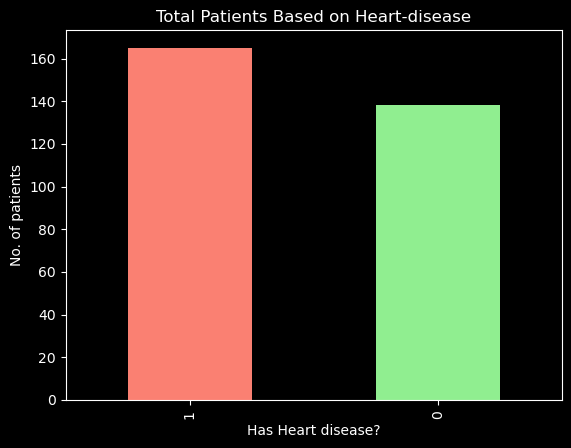

In [7]:
# Plot the value counts in a bar graph
heart_disease_df["target"].value_counts().plot.bar(
    color=["salmon", "lightgreen"],
    xlabel="Has Heart disease?",
    ylabel="No. of patients",
    title="Total Patients Based on Heart-disease"
);

Another way to get some quick statistic about our data is to use `.describe()`.

`.describe()` is used to get detailed statistic (min, max, sd etc.) about all the **Numeric columns** of the DataFrame.

In [8]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Let's compare different columns with different ones**

### **Heart Disease according to different Genders**

First let's see the ratio of genders in our DataSet.

In [9]:
# Let's count records per sex in our DataSet
heart_disease_df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

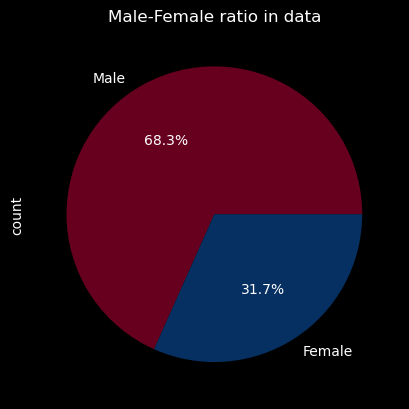

In [10]:
# Visualize the pie chart of different sexes in our DataSet.
heart_disease_df["sex"].value_counts().plot(
                                        kind="pie",
                                        labels=["Male", "Female"],
                                        title="Male-Female ratio in data",
                                        colormap="RdBu",
                                        autopct='%1.1f%%'
                                    );
# Definitely, data contains lot's of Male records, so there tend to have more diseased males as compared to females.

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`. 

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column. 

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [11]:
# Here, as male records are more than female records, data will contain more diseased males.

# Let's calculate a "Cross table" for our sex & target(heart-disease) column.
# It will count the numbers by default.
pd.crosstab(
    heart_disease_df["sex"],
    heart_disease_df["target"],
    margins=True,
    margins_name="Total"
)

target,0,1,Total
sex,,,
0,24,72,96
1,114,93,207
Total,138,165,303


What can we infer from this? Let's make a simple heuristic.

Since there are 96 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a **75% chance** she has heart disease.

As for males, there's 207 total with around half indicating a presence of heart disease. So we might predict, if the participant is male,** 45% of the time** he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's **a 62.5% chance** they have heart disease.

Of course, this is just probability based on collected sample data, this is just a basic estimate.

This can be our very simple **baseline**, we'll try to beat it with machine learning.

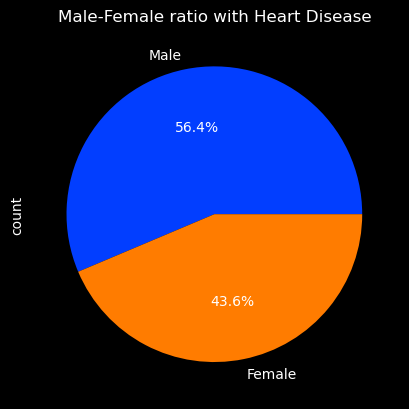

In [12]:
## Let's count gender (male or female) who has any "heart disease"
gender_with_heart_disease = heart_disease_df[heart_disease_df.target==1].sex.value_counts().plot.pie(
    labels = ["Male", "Female"],
    colors = sns.color_palette("bright"),
    autopct='%1.1f%%',
    title="Male-Female ratio with Heart Disease"
)

In [13]:
# So as expected, we have 56.4% diseased males and 43.6% diseased females total.
pd.crosstab(
    heart_disease_df["sex"],
    heart_disease_df["target"],
    margins=True,
    margins_name="Total"
)

target,0,1,Total
sex,,,
0,24,72,96
1,114,93,207
Total,138,165,303


* We can Even visualize the **diseased & non-diseased gender portions** with a **grouped bar chart.**

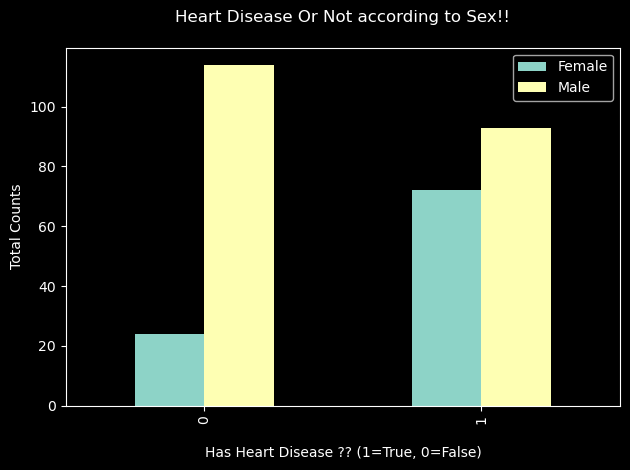

In [14]:
pd.crosstab(heart_disease_df["target"], heart_disease_df["sex"]).plot.bar(
    xlabel = "\nHas Heart Disease ?? (1=True, 0=False)",
    ylabel = "Total Counts",
    title = "Heart Disease Or Not according to Sex!!\n"
);

plt.legend(["Female", "Male"]);
plt.tight_layout()
plt.show()